# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [14]:
from math import pi
p=str(pi)
def mult_dec_pi(a,b):
    if a>15 or b>15:
        print ('Error')
        return
    if isinstance(a, int) & isinstance(b, int):
        result=int(p[1+a:2+a])*int(p[1+b:2+b]) 
        return result
    else:
        print ('los valores deben ser enteros')
        return

In [15]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [16]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [17]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [18]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [19]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

Error


In [22]:
# Bonus
mult_dec_pi(a=6.3, b=4)

los valores deben ser enteros


# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

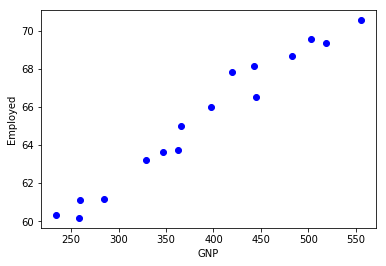

In [68]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [70]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()
x=data[:,2]
y=data[:,1]
Reg.fit(x[:,None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Parámetros de la regresión
print("Pendiente: "+str(Reg.coef_))
print("Intercepto: "+str(Reg.intercept_))

Pendiente: [0.03475229]
Intercepto: 51.84358978188415


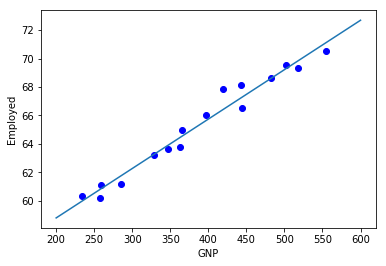

In [72]:
x_new = np.linspace(200, 600, 400)
y_new = Reg.predict(x_new[:, None])
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")
plt.plot(x_new, y_new)

# Exercise 01.3

Analyze the baby names dataset using pandas

In [73]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [74]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [75]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [87]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

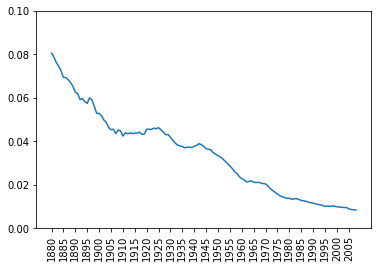

In [88]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

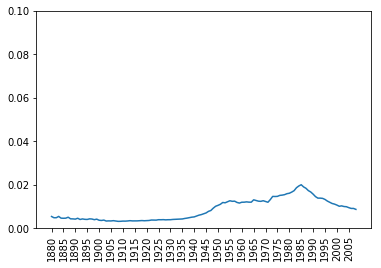

In [89]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [126]:
df=  pd.DataFrame(boys, columns=['year','name',	'prop',	'sex',	'soundex', 'Decada'])
df.head()


,year,name,prop,sex,soundex,Decada
0,1880,John,0.081541,boy,J500,NaN
1,1880,William,0.080511,boy,W450,NaN
2,1880,James,0.050057,boy,J520,NaN
3,1880,Charles,0.045167,boy,C642,NaN
4,1880,George,0.043292,boy,G620,NaN


In [139]:
year=boys['year']
year=year.astype(str)
for i in range(129000):
    year[i]=year[i][:3]
df.Decada=year+str(0)
df.Decada[:5]

0    1880
1    1880
2    1880
3    1880
4    1880
Name: Decada, dtype: object

In [130]:
y1=df.groupby(['Decada','name']).sum().sort_values(['Decada','prop'], ascending=False)['prop']
y1=y1.reset_index()
y1.head(20)

,Decada,name,prop
0,2000,Jacob,0.119122
1,2000,Michael,0.109169
2,2000,Joshua,0.100953
3,2000,Matthew,0.096980
4,2000,Christopher,0.088447
5,2000,Andrew,0.088413
6,2000,Daniel,0.087555
7,2000,Ethan,0.085613
8,2000,Joseph,0.084645
9,2000,William,0.083027


In [131]:

def name(a):
    if a==0:
        print("El nombre de niño más popular de la década de "+ str(y1.Decada[a])+" es "+y1.name[a]+" con proporción de "+str(round(y1.prop[a],2)))
        return
    if y1.Decada[a] != y1.Decada[a-1]:
        print("El nombre de niño  más popular de la década de "+ str(y1.Decada[a])+" es "+y1.name[a]+" con proporción de "+str(round(y1.prop[a],2)))
        return
for i in range(129000):
    name(i)

El nombre de niño más popular de la década de 2000 es Jacob con proporción de 0.12
El nombre de niño  más popular de la década de 1990 es Michael con proporción de 0.22
El nombre de niño  más popular de la década de 1980 es Michael con proporción de 0.35
El nombre de niño  más popular de la década de 1970 es Michael con proporción de 0.41
El nombre de niño  más popular de la década de 1960 es Michael con proporción de 0.43
El nombre de niño  más popular de la década de 1950 es James con proporción de 0.41
El nombre de niño  más popular de la década de 1940 es James con proporción de 0.53
El nombre de niño  más popular de la década de 1930 es Robert con proporción de 0.54
El nombre de niño  más popular de la década de 1920 es Robert con proporción de 0.51
El nombre de niño  más popular de la década de 1910 es John con proporción de 0.54
El nombre de niño  más popular de la década de 1900 es John con proporción de 0.58
El nombre de niño  más popular de la década de 1890 es John con propo

KeyError: 17267

# Exercise 01.4

Which has been the most popular girl name?


In [132]:
df=  pd.DataFrame(girls, columns=['year','name','prop',	'sex',	'soundex', 'Decada'])
df=df.reset_index()
df.head()

,index,year,name,prop,sex,soundex,Decada
0,129000,1880,Mary,0.072381,girl,M600,NaN
1,129001,1880,Anna,0.026678,girl,A500,NaN
2,129002,1880,Emma,0.020521,girl,E500,NaN
3,129003,1880,Elizabeth,0.019865,girl,E421,NaN
4,129004,1880,Minnie,0.017888,girl,M500,NaN


In [133]:
year=df['year']
year=year.astype(str)
for i in range(129000):
    year[i]=year[i][:3]  
df.Decada=year+str(0)
df.Decada[:5]


0    1880
1    1880
2    1880
3    1880
4    1880
Name: Decada, dtype: object

In [134]:
y1=df.groupby(['Decada','name']).sum().sort_values(['Decada','prop'], ascending=False)['prop']
y1=y1.reset_index()
def name(a):
    if a==0:
        print("El nombre de niña más popular de la década de "+ str(y1.Decada[a])+" es "+y1.name[a]+" con proporción de "+str(round(y1.prop[a],2)))
        return
    if y1.Decada[a] != y1.Decada[a-1]:
        print("El nombre de niña  más popular de la década de "+ str(y1.Decada[a])+" es "+y1.name[a]+" con proporción de "+str(round(y1.prop[a],2)))
        return
for i in range(129000):
    name(i)
for i in range(129000):
    name(i)

El nombre de niña más popular de la década de 2000 es Emily con proporción de 0.1
El nombre de niña  más popular de la década de 1990 es Jessica con proporción de 0.15
El nombre de niña  más popular de la década de 1980 es Jessica con proporción de 0.25
El nombre de niña  más popular de la década de 1970 es Jennifer con proporción de 0.36
El nombre de niña  más popular de la década de 1960 es Lisa con proporción de 0.27
El nombre de niña  más popular de la década de 1950 es Mary con proporción de 0.32
El nombre de niña  más popular de la década de 1940 es Mary con proporción de 0.43
El nombre de niña  más popular de la década de 1930 es Mary con proporción de 0.52
El nombre de niña  más popular de la década de 1920 es Mary con proporción de 0.57
El nombre de niña  más popular de la década de 1910 es Mary con proporción de 0.56
El nombre de niña  más popular de la década de 1900 es Mary con proporción de 0.52
El nombre de niña  más popular de la década de 1890 es Mary con proporción de 

KeyError: 17184

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [135]:
y2=df.groupby(['year','name']).sum().sort_values(['year','prop'], ascending=False)['prop']
y2=y2.reset_index()
y2[y2['year']==2000].head(1)

,year,name,prop
8000,2000,Emily,0.013017


El nombre de niña más popular de la década de los 2000 es Emily